# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [2]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [3]:
filename="C:/Users/max dore/Downloads/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [ ]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [ ]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [ ]:
Fisher.fit(X_Train,y_Train)

We can plot the output, comparing signal and background:

In [ ]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

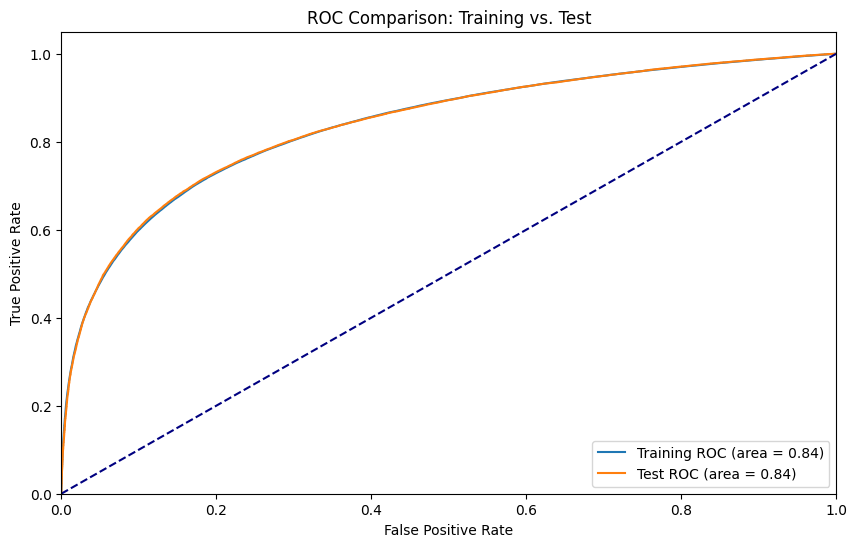

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

X_train_imputed, X_test_imputed, y_train, y_test = train_test_split(X_imputed, y, test_size=0.5, random_state=42)

import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

filename="C:/Users/max dore/Downloads/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_Train)
X_test_imputed = imputer.transform(X_Test)
Test_sig_imputed = imputer.transform(Test_sig[VarNames[1:]])
Test_bkg_imputed = imputer.transform(Test_bkg[VarNames[1:]])

Fisher.fit(X_train_imputed,y_Train)

train_probabilities = Fisher.predict_proba(X_train_imputed)[:, 1]
test_probabilities = Fisher.predict_proba(X_test_imputed)[:, 1]

train_probabilities = Fisher.predict_proba(X_train_imputed)[:, 1]
test_probabilities = Fisher.predict_proba(X_test_imputed)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_train, tpr_train, _ = roc_curve(y_Train, train_probabilities)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_Test, test_probabilities)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotting both ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label='Training ROC (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison: Training vs. Test')
plt.legend(loc="lower right")
plt.show()

In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

NameError: name 'X_train' is not defined

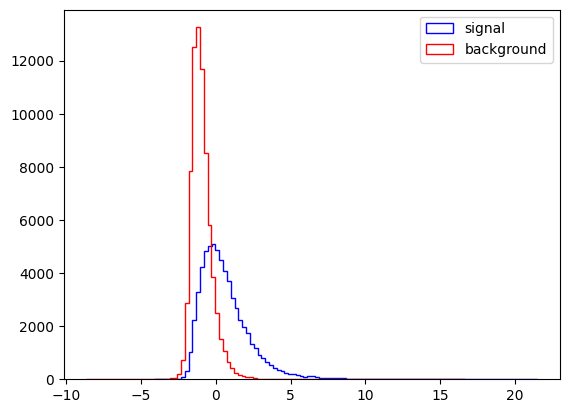

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate
from sklearn.impute import SimpleImputer

import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

filename="C:/Users/max dore/Downloads/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_Train)
X_test_imputed = imputer.transform(X_Test)
Test_sig_imputed = imputer.transform(Test_sig[VarNames[1:]])
Test_bkg_imputed = imputer.transform(Test_bkg[VarNames[1:]])

Fisher.fit(X_train_imputed,y_Train)

plt.figure()
plt.hist(Fisher.decision_function(Test_sig_imputed),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg_imputed),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [ ]:
#RAW

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier

import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

HC = HistGradientBoostingClassifier()

filename="C:/Users/max dore/Downloads/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

HC.fit(X_Train,y_Train)

plt.figure()
plt.hist(HC.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(HC.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#--------------------------------------------------------------------------------------------------------

#FEATURED

imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df[VarNames[1:]])
df_imputed = pd.DataFrame(df_imputed, columns=VarNames[1:]) 

N_Train=500000

Train_Sample2=df_imputed[:N_Train]
Test_Sample2=df_imputed[N_Train:]

X_Train2=Train_Sample2[VarNames[1:]]
y_Train2=df['signal'][:N_Train] 

X_Test2=Test_Sample2[VarNames[1:]]
y_Test2=df['signal'][N_Train:]

signal_indices = df[N_Train:].index[df['signal'][N_Train:] == 1]
background_indices = df[N_Train:].index[df['signal'][N_Train:] == 0]

Test_sig2 = Test_Sample2.loc[signal_indices]
Test_bkg2 = Test_Sample2.loc[background_indices]

HC.fit(X_Train2,y_Train2)

plt.figure()
plt.hist(HC.decision_function(Test_sig2[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(HC.decision_function(Test_bkg2[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#------------------------------------

#FEATURED + RAW

df.reset_index(drop=True, inplace=True)
df_imputed.reset_index(drop=True, inplace=True)
combined_df = pd.concat([df, df_imputed.add_suffix('_imputed')], axis=1)

combined_features = VarNames[1:] + [f"{name}_imputed" for name in VarNames[1:]]

N_Train=500000

Train_Sample3=combined_df[:N_Train]
Test_Sample3=combined_df[N_Train:]

X_Train3=Train_Sample3[combined_features]
y_Train3=df['signal'][:N_Train] 

X_Test3=Test_Sample3[combined_features]
y_Test3=df['signal'][N_Train:]

signal_indices = df[N_Train:].index[df['signal'][N_Train:] == 1]
background_indices = df[N_Train:].index[df['signal'][N_Train:] == 0]

Test_sig3 = Test_Sample3.loc[signal_indices]
Test_bkg3 = Test_Sample3.loc[background_indices]

HC.fit(X_Train3,y_Train3)

print(combined_features)
print(Train_Sample3.columns)

plt.figure()
plt.hist(HC.decision_function(Test_sig3[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(HC.decision_function(Test_bkg3[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()


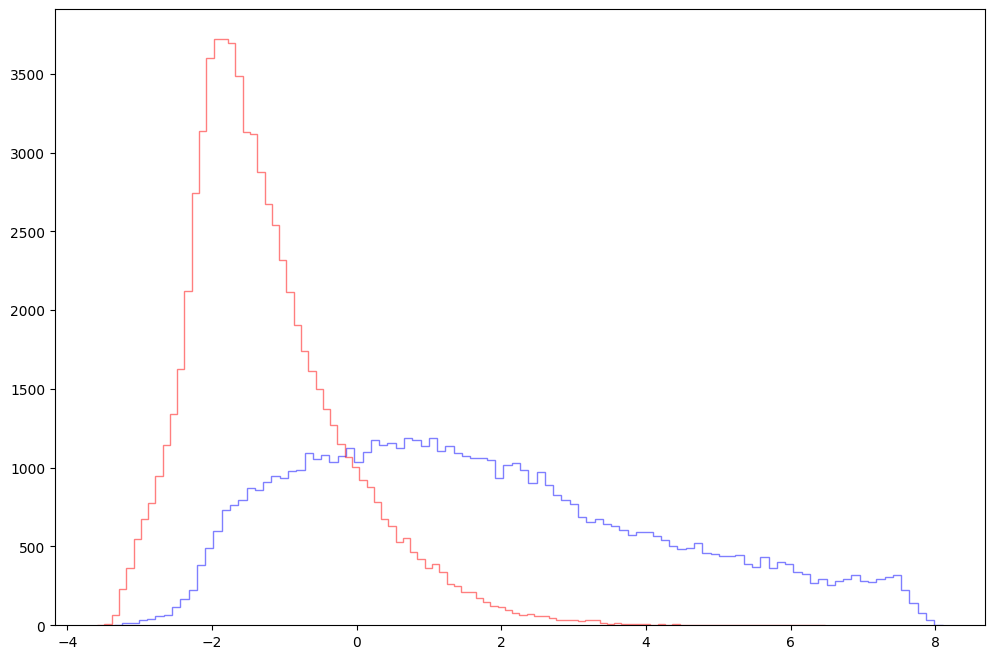

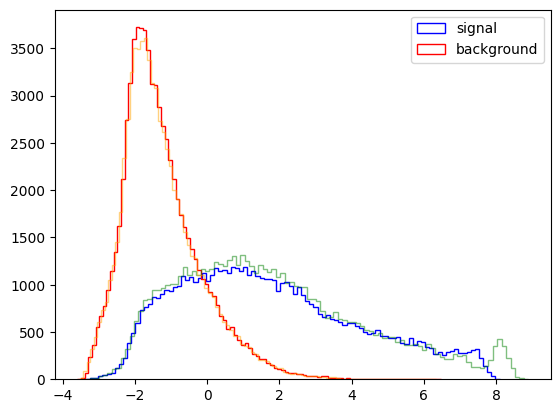

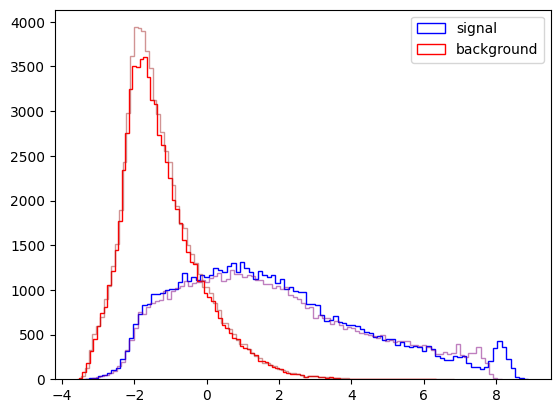

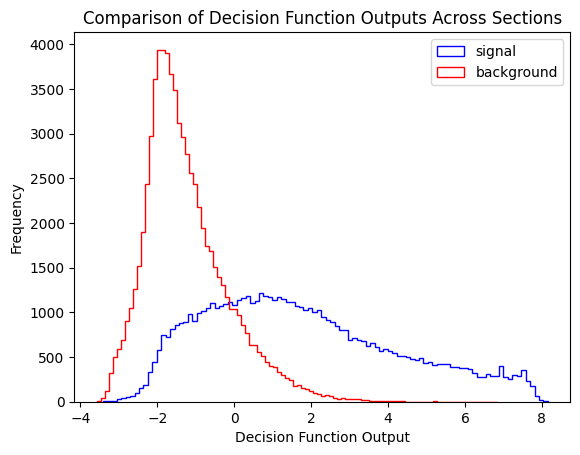

In [39]:
#RAW

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier

import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

HC = HistGradientBoostingClassifier()

filename="C:/Users/max dore/Downloads/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

plt.figure(figsize=(12, 8))

N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

HC.fit(X_Train,y_Train)
plt.hist(HC.decision_function(Test_sig[VarNames[1:]]), bins=100, histtype="step", color="blue", alpha=0.5, label="RAW Signal", stacked=True)
plt.hist(HC.decision_function(Test_bkg[VarNames[1:]]), bins=100, histtype="step", color="red", alpha=0.5, label="RAW Background", stacked=True)


plt.figure()
plt.hist(HC.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(HC.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show

#--------------------------------------------------------------------------------------------------------

#FEATURED

imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df[VarNames[1:]])
df_imputed = pd.DataFrame(df_imputed, columns=VarNames[1:]) 

N_Train=500000

Train_Sample2=df_imputed[:N_Train]
Test_Sample2=df_imputed[N_Train:]

X_Train2=Train_Sample2[VarNames[1:]]
y_Train2=df['signal'][:N_Train] 

X_Test2=Test_Sample2[VarNames[1:]]
y_Test2=df['signal'][N_Train:]

signal_indices = df[N_Train:].index[df['signal'][N_Train:] == 1]
background_indices = df[N_Train:].index[df['signal'][N_Train:] == 0]

Test_sig2 = Test_Sample2.loc[signal_indices]
Test_bkg2 = Test_Sample2.loc[background_indices]

HC.fit(X_Train2,y_Train2)
plt.hist(HC.decision_function(Test_sig2), bins=100, histtype="step", color="green", alpha=0.5, label="FEATURED Signal", stacked=True)
plt.hist(HC.decision_function(Test_bkg2), bins=100, histtype="step", color="orange", alpha=0.5, label="FEATURED Background", stacked=True)

plt.figure()
plt.hist(HC.decision_function(Test_sig2[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(HC.decision_function(Test_bkg2[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show

#------------------------------------

#FEATURED + RAW

combined_features = VarNames[1:] + [f"{name}_imputed" for name in VarNames[1:]]

N_Train = 500000
Train_Sample3 = combined_df[:N_Train]
Test_Sample3 = combined_df[N_Train:]

X_Train3 = Train_Sample3[combined_features]
y_Train3 = df['signal'][:N_Train]
X_Test3 = Test_Sample3[combined_features]
y_Test3 = df['signal'][N_Train:]

signal_indices = df[N_Train:].index[df['signal'][N_Train:] == 1]
background_indices = df[N_Train:].index[df['signal'][N_Train:] == 0]

Test_sig3 = Test_Sample3.loc[signal_indices]
Test_bkg3 = Test_Sample3.loc[background_indices]

HC = HistGradientBoostingClassifier()
HC.fit(X_Train3, y_Train3)
plt.hist(HC.decision_function(X_Test3.loc[signal_indices]), bins=100, histtype="step", color="purple", alpha=0.5, label="FEATURED + RAW Signal", stacked=True)
plt.hist(HC.decision_function(X_Test3.loc[background_indices]), bins=100, histtype="step", color="brown", alpha=0.5, label="FEATURED + RAW Background", stacked=True)


plt.figure()
plt.hist(HC.decision_function(X_Test3.loc[signal_indices]), bins=100, histtype="step", color="blue", label="signal", stacked=True)
plt.hist(HC.decision_function(X_Test3.loc[background_indices]), bins=100, histtype="step", color="red", label="background", stacked=True)
plt.legend(loc='upper right')
plt.show

plt.legend(loc='upper right')
plt.xlabel('Decision Function Output')
plt.ylabel('Frequency')
plt.title('Comparison of Decision Function Outputs Across Sections')
plt.show()

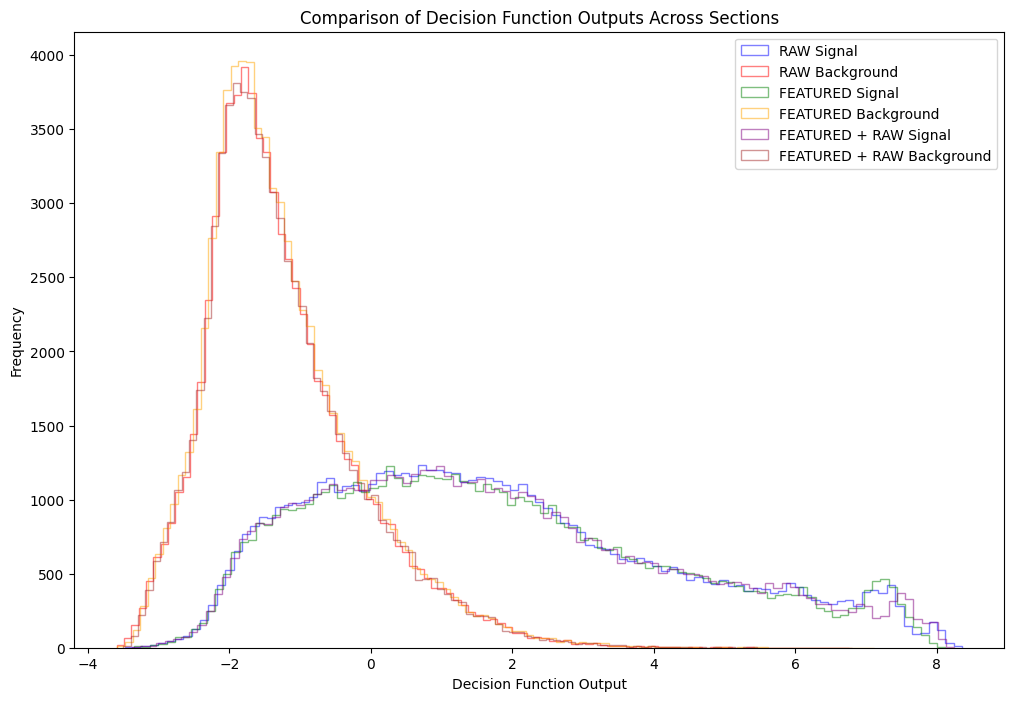

In [40]:
#RAW

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier

import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

HC = HistGradientBoostingClassifier()

filename="C:/Users/max dore/Downloads/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

plt.figure(figsize=(12, 8))

N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

HC.fit(X_Train,y_Train)
plt.hist(HC.decision_function(Test_sig[VarNames[1:]]), bins=100, histtype="step", color="blue", alpha=0.5, label="RAW Signal", stacked=True)
plt.hist(HC.decision_function(Test_bkg[VarNames[1:]]), bins=100, histtype="step", color="red", alpha=0.5, label="RAW Background", stacked=True)

#--------------------------------------------------------------------------------------------------------

#FEATURED

imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df[VarNames[1:]])
df_imputed = pd.DataFrame(df_imputed, columns=VarNames[1:]) 

N_Train=500000

Train_Sample2=df_imputed[:N_Train]
Test_Sample2=df_imputed[N_Train:]

X_Train2=Train_Sample2[VarNames[1:]]
y_Train2=df['signal'][:N_Train] 

X_Test2=Test_Sample2[VarNames[1:]]
y_Test2=df['signal'][N_Train:]

signal_indices = df[N_Train:].index[df['signal'][N_Train:] == 1]
background_indices = df[N_Train:].index[df['signal'][N_Train:] == 0]

Test_sig2 = Test_Sample2.loc[signal_indices]
Test_bkg2 = Test_Sample2.loc[background_indices]

HC.fit(X_Train2,y_Train2)
plt.hist(HC.decision_function(Test_sig2), bins=100, histtype="step", color="green", alpha=0.5, label="FEATURED Signal", stacked=True)
plt.hist(HC.decision_function(Test_bkg2), bins=100, histtype="step", color="orange", alpha=0.5, label="FEATURED Background", stacked=True)

#------------------------------------

#FEATURED + RAW

combined_features = VarNames[1:] + [f"{name}_imputed" for name in VarNames[1:]]

N_Train = 500000
Train_Sample3 = combined_df[:N_Train]
Test_Sample3 = combined_df[N_Train:]

X_Train3 = Train_Sample3[combined_features]
y_Train3 = df['signal'][:N_Train]
X_Test3 = Test_Sample3[combined_features]
y_Test3 = df['signal'][N_Train:]

signal_indices = df[N_Train:].index[df['signal'][N_Train:] == 1]
background_indices = df[N_Train:].index[df['signal'][N_Train:] == 0]

Test_sig3 = Test_Sample3.loc[signal_indices]
Test_bkg3 = Test_Sample3.loc[background_indices]

HC = HistGradientBoostingClassifier()
HC.fit(X_Train3, y_Train3)
plt.hist(HC.decision_function(X_Test3.loc[signal_indices]), bins=100, histtype="step", color="purple", alpha=0.5, label="FEATURED + RAW Signal", stacked=True)
plt.hist(HC.decision_function(X_Test3.loc[background_indices]), bins=100, histtype="step", color="brown", alpha=0.5, label="FEATURED + RAW Background", stacked=True)

plt.legend(loc='upper right')
plt.xlabel('Decision Function Output')
plt.ylabel('Frequency')
plt.title('Comparison of Decision Function Outputs Across Sections')
plt.show()

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

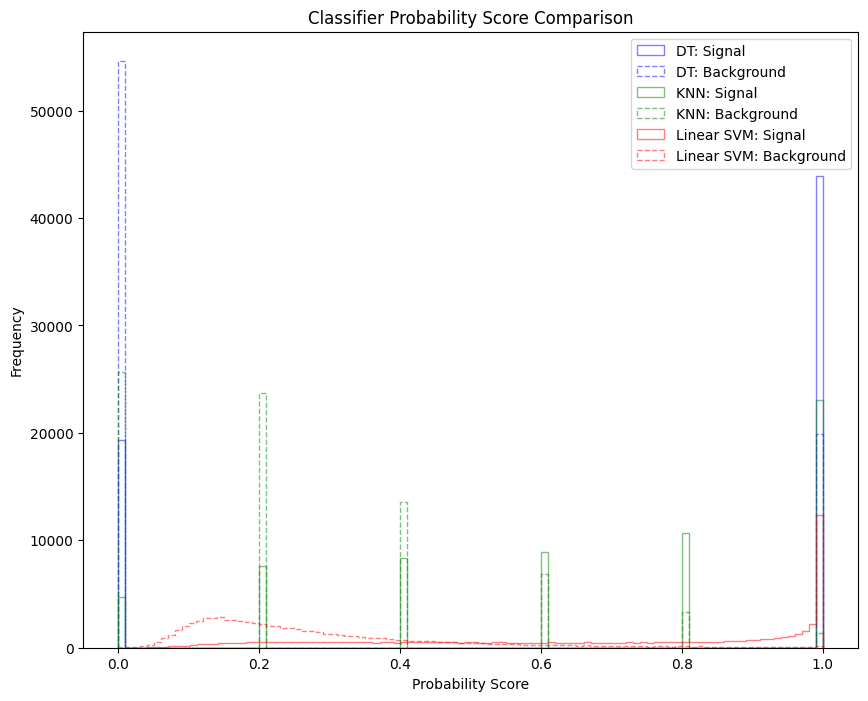

In [8]:
#4a

#DecisionTree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()
filename = "C:/Users/max dore/Downloads/SUSY.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", 
            "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
            "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

N_Train = 500000
Train_Sample = df[:N_Train]
Test_Sample = df[N_Train:]

X_Train = Train_Sample[VarNames[1:]]
y_Train = Train_Sample["signal"]
X_Test = Test_Sample[VarNames[1:]]
y_Test = Test_Sample["signal"]

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_Train)
X_test_imputed = imputer.transform(X_Test)

Test_sig = Test_Sample[Test_Sample.signal == 1][VarNames[1:]]
Test_bkg = Test_Sample[Test_Sample.signal == 0][VarNames[1:]]
Test_sig_imputed = imputer.transform(Test_sig)
Test_bkg_imputed = imputer.transform(Test_bkg)

DT = DecisionTreeClassifier()
DT.fit(X_train_imputed, y_Train)
DT_decision_scores_sig = DT.predict_proba(Test_sig_imputed)[:, 1]
DT_decision_scores_bkg = DT.predict_proba(Test_bkg_imputed)[:, 1]

#------------------------------

# Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier

N_Train = 500000
Train_Sample = df[:N_Train]
Test_Sample = df[N_Train:]

X_Train = Train_Sample[VarNames[1:]]
y_Train = Train_Sample["signal"]
X_Test = Test_Sample[VarNames[1:]]
y_Test = Test_Sample["signal"]

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_Train)
X_test_imputed = imputer.transform(X_Test)

Test_sig = Test_Sample[Test_Sample.signal == 1][VarNames[1:]]
Test_bkg = Test_Sample[Test_Sample.signal == 0][VarNames[1:]]
Test_sig_imputed = imputer.transform(Test_sig)
Test_bkg_imputed = imputer.transform(Test_bkg)

KNN = KNeighborsClassifier()
KNN.fit(X_train_imputed, y_Train)
KNN_decision_scores_sig = KNN.predict_proba(Test_sig_imputed)[:, 1]
KNN_decision_scores_bkg = KNN.predict_proba(Test_bkg_imputed)[:, 1]


#--------------------------
#linear SVM

from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

N_Train = 500000
Train_Sample = df[:N_Train]
Test_Sample = df[N_Train:]

X_Train = Train_Sample[VarNames[1:]]
y_Train = Train_Sample["signal"]
X_Test = Test_Sample[VarNames[1:]]
y_Test = Test_Sample["signal"]

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_Train)
X_test_imputed = imputer.transform(X_Test)

Test_sig = Test_Sample[Test_Sample.signal == 1][VarNames[1:]]
Test_bkg = Test_Sample[Test_Sample.signal == 0][VarNames[1:]]
Test_sig_imputed = imputer.transform(Test_sig)
Test_bkg_imputed = imputer.transform(Test_bkg)

linear_svc = LinearSVC(max_iter=10000, dual=False)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_imputed, y_Train)
svc_decision_scores_sig = calibrated_svc.predict_proba(Test_sig_imputed)[:, 1]
svc_decision_scores_bkg = calibrated_svc.predict_proba(Test_bkg_imputed)[:, 1]

#-----------------------------------------------

plt.figure(figsize=(10, 8))

bins = 100
alpha = 0.5

plt.hist(DT_decision_scores_sig, bins=bins, alpha=alpha, color='blue', label='DT: Signal', histtype='step')
plt.hist(DT_decision_scores_bkg, bins=bins, alpha=alpha, color='blue', label='DT: Background', histtype='step', linestyle='dashed')

plt.hist(KNN_decision_scores_sig, bins=bins, alpha=alpha, color='green', label='KNN: Signal', histtype='step')
plt.hist(KNN_decision_scores_bkg, bins=bins, alpha=alpha, color='green', label='KNN: Background', histtype='step', linestyle='dashed')

plt.hist(svc_decision_scores_sig, bins=bins, alpha=alpha, color='red', label='Linear SVM: Signal', histtype='step')
plt.hist(svc_decision_scores_bkg, bins=bins, alpha=alpha, color='red', label='Linear SVM: Background', histtype='step', linestyle='dashed')

plt.title('Classifier Probability Score Comparison')
plt.xlabel('Probability Score')
plt.ylabel('Frequency')

plt.legend(loc='best')

plt.show()

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

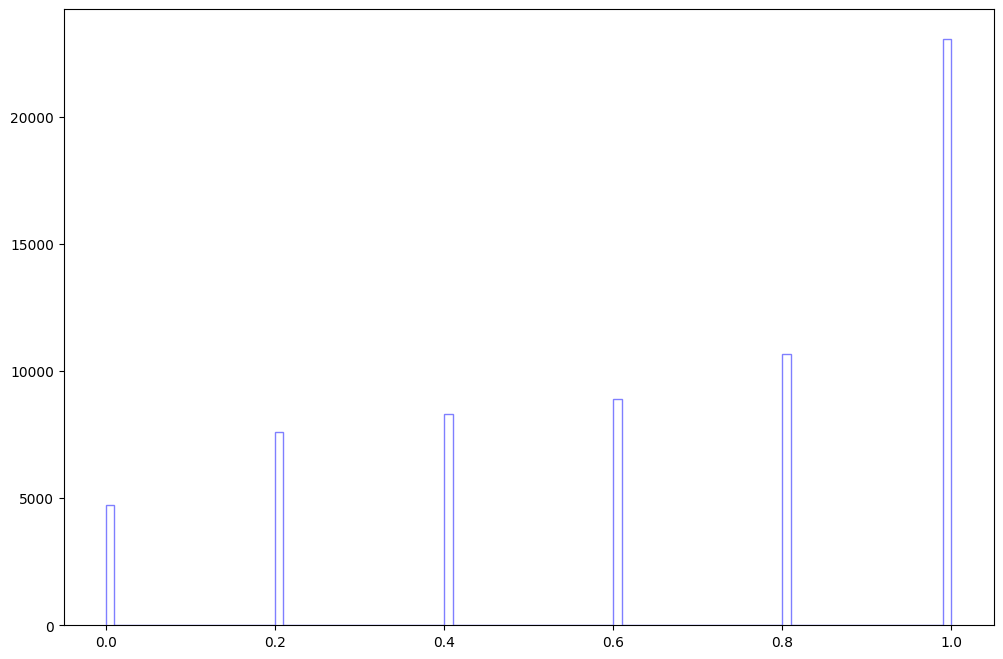

In [9]:
#4b

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

filename = "C:/Users/max dore/Downloads/SUSY.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", 
            "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
            "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

plt.figure(figsize=(12, 8))

N_Train = 500000

# RAW

Train_Sample = df[:N_Train]
Test_Sample = df[N_Train:]

X_Train = Train_Sample[VarNames[1:]]
y_Train = Train_Sample["signal"]

X_Test = Test_Sample[VarNames[1:]]
y_Test = Test_Sample["signal"]

Test_sig = Test_Sample[Test_Sample.signal == 1]
Test_bkg = Test_Sample[Test_Sample.signal == 0]

KNN = KNeighborsClassifier()
KNN.fit(X_Train, y_Train)
plt.hist(KNN.predict_proba(Test_sig[VarNames[1:]])[:, 1], bins=100, histtype="step", color="blue", alpha=0.5, label="RAW Signal", stacked=True)
plt.hist(KNN.predict_proba(Test_bkg[VarNames[1:]])[:, 1], bins=100, histtype="step", color="red", alpha=0.5, label="RAW Background", stacked=True)

#-------------------------------------------

# FEATURED

imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df[VarNames[1:]])
df_imputed = pd.DataFrame(df_imputed, columns=VarNames[1:]) 

Train_Sample2 = df_imputed[:N_Train]
Test_Sample2 = df_imputed[N_Train:]

X_Train2 = Train_Sample2
y_Train2 = df['signal'][:N_Train]

X_Test2 = Test_Sample2
y_Test2 = df['signal'][N_Train:]

KNN.fit(X_Train2, y_Train2)
plt.hist(KNN.predict_proba(X_Test2.loc[df[N_Train:].index[df['signal'][N_Train:] == 1]])[:, 1], bins=100, histtype="step", color="green", alpha=0.5, label="FEATURED Signal", stacked=True)
plt.hist(KNN.predict_proba(X_Test2.loc[df[N_Train:].index[df['signal'][N_Train:] == 0]])[:, 1], bins=100, histtype="step", color="orange", alpha=0.5, label="FEATURED Background", stacked=True)

#---------------------------------------

# FEATURED + RAW

df.reset_index(drop=True, inplace=True)
df_imputed.reset_index(drop=True, inplace=True)
combined_df = pd.concat([df, df_imputed.add_suffix('_imputed')], axis=1)

combined_features = VarNames[1:] + [f"{name}_imputed" for name in VarNames[1:]]

Train_Sample3 = combined_df[:N_Train]
Test_Sample3 = combined_df[N_Train:]

X_Train3 = Train_Sample3[combined_features]
y_Train3 = df['signal'][:N_Train]

X_Test3 = Test_Sample3[combined_features]
y_Test3 = df['signal'][N_Train:]

KNN = KNeighborsClassifier()
KNN.fit(X_Train3, y_Train3)
plt.hist(KNN.predict_proba(X_Test3.loc[df[N_Train:].index[df['signal'][N_Train:] == 1]])[:, 1], bins=100, histtype="step", color="purple", alpha=0.5, label="FEATURED + RAW Signal", stacked=True)
plt.hist(KNN.predict_proba(X_Test3.loc[df[N_Train:].index[df['signal'][N_Train:] == 0]])[:, 1], bins=100, histtype="step", color="brown", alpha=0.5, label="FEATURED + RAW Background", stacked=True)

plt.legend(loc='upper right')
plt.xlabel('Probability Score')
plt.ylabel('Frequency')
plt.title('Comparison of KNN Classifier Outputs Across Sections')
plt.show()

In [13]:
#4c

import numpy as np

TPR = 0.6926061798482023
precision = 0.6881401489184071
FPR = 1 - precision


scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

significances = {}
for scenario, (Ns, Nb) in enumerate(scenarios, 1):
    TP = TPR * Ns
    FP = FPR * Nb
    significance = TP / np.sqrt(TP + FP)
    significances[f'Scenario {scenario}'] = significance

for scenario, sig in significances.items():
    print(f"{scenario}: {sig:.4f}")

Scenario 1: 1.1219
Scenario 2: 3.5478
Scenario 3: 11.2190
Scenario 4: 35.4777


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

filename = "C:/Users/max dore/Downloads/SUSY.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", 
            "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
            "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

X = df.iloc[:, 1:].values  # Assuming the first column is the target, the rest are features
y = df.iloc[:, 0].values   # Assuming the first column is the target

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.5, random_state=42)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_scores = classifier.predict_proba(X_test)[:, 1]  # Scores for ROC and AUC
y_pred = classifier.predict(X_test)  # Predicted classes for accuracy and other metrics

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

conf_mat = confusion_matrix(y_test, y_pred)
TP = conf_mat[1, 1]
FP = conf_mat[0, 1]
maximal_significance = TP / np.sqrt(TP + FP)

print(f"ROC AUC: {roc_auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Maximal Significance: {maximal_significance}")

ROC AUC: 0.7131417173296193
Precision: 0.6881401489184071
Recall: 0.6926061798482023
F1 Score: 0.6903659416835769
Accuracy: 0.7148250700064911
Maximal Significance: 264.1319986631587
